In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import sklearn
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [7]:
df = df_train.append(df_test).reset_index(drop = True)
df.shape

(2919, 81)

In [8]:
df.tail()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2914,546,546,0,NaN,3,Twnhs,TA,No,0.000,0.000,Unf,Unf,0.000,0.000,TA,546.000,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,1,Typ,0.000,0.000,NaN,NaN,NaN,NaN,nan,1092,1,GasA,Gd,2Story,2915,1,TA,Lvl,Gtl,1936,Inside,21.000,Reg,0,160,RM,0.000,None,NaN,0,6,MeadowV,0,7,4,Y,0,NaN,CompShg,Gable,Normal,nan,WD,0,Pave,5,546.000,AllPub,0,1970,1970,2006
2915,546,546,0,NaN,3,TwnhsE,TA,No,252.000,0.000,Rec,Unf,0.000,0.000,TA,294.000,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,NaN,NaN,0,CBlock,1,Typ,286.000,1.000,TA,Unf,TA,CarPort,1970.000,1092,1,GasA,TA,2Story,2916,1,TA,Lvl,Gtl,1894,Inside,21.000,Reg,0,160,RM,0.000,None,NaN,0,4,MeadowV,24,5,4,Y,0,NaN,CompShg,Gable,Abnorml,nan,WD,0,Pave,6,546.000,AllPub,0,1970,1970,2006
2916,1224,0,0,NaN,4,1Fam,TA,No,1224.000,0.000,ALQ,Unf,1.000,0.000,TA,0.000,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,TA,1,CBlock,1,Typ,576.000,2.000,TA,Unf,TA,Detchd,1960.000,1224,0,GasA,Ex,1Story,2917,1,TA,Lvl,Gtl,20000,Inside,160.000,Reg,0,20,RL,0.000,None,NaN,0,9,Mitchel,0,7,5,Y,0,NaN,CompShg,Gable,Abnorml,nan,WD,0,Pave,7,1224.000,AllPub,474,1960,1996,2006
2917,970,0,0,NaN,3,1Fam,TA,Av,337.000,0.000,GLQ,Unf,0.000,1.000,Gd,575.000,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,NaN,0,PConc,1,Typ,0.000,0.000,NaN,NaN,NaN,NaN,nan,970,0,GasA,TA,SFoyer,2918,1,TA,Lvl,Gtl,10441,Inside,62.000,Reg,0,85,RL,0.000,None,Shed,700,7,Mitchel,32,5,5,Y,0,NaN,CompShg,Gable,Normal,nan,WD,0,Pave,6,912.000,AllPub,80,1992,1992,2006
2918,996,1004,0,NaN,3,1Fam,TA,Av,758.000,0.000,LwQ,Unf,0.000,0.000,Gd,238.000,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,NaN,TA,1,PConc,2,Typ,650.000,3.000,TA,Fin,TA,Attchd,1993.000,2000,1,GasA,Ex,2Story,2919,1,TA,Lvl,Mod,9627,Inside,74.000,Reg,0,60,RL,94.000,BrkFace,NaN,0,11,Mitchel,48,5,7,Y,0,NaN,CompShg,Gable,Normal,nan,WD,0,Pave,9,996.000,AllPub,190,1993,1994,2006


In [9]:
#bu iki verisetini birleştirdiğimiz için nan değerler olacaktır. Nan değer sayısana bakalım.

df["SalePrice"].value_counts(dropna=False)

nan           1459
140000.000      20
135000.000      17
145000.000      14
155000.000      14
              ... 
415298.000       1
116900.000       1
216500.000       1
403000.000       1
383970.000       1
Name: SalePrice, Length: 664, dtype: int64

In [10]:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, cat_but_car, num_cols, num_but_cat


In [11]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [12]:
cat_but_car

['Neighborhood']

In [13]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 
                       "Ratio": dataframe[col_name].value_counts() / len(dataframe)}))
    print("--------------------------------")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show()

In [14]:
for col in cat_cols:
    cat_summary(df, col)

      Alley  Ratio
Grvl    120  0.041
Pave     78  0.027
--------------------------------
        BldgType  Ratio
1Fam        2425  0.831
TwnhsE       227  0.078
Duplex       109  0.037
Twnhs         96  0.033
2fmCon        62  0.021
--------------------------------
    BsmtCond  Ratio
TA      2606  0.893
Gd       122  0.042
Fa       104  0.036
Po         5  0.002
--------------------------------
    BsmtExposure  Ratio
No          1904  0.652
Av           418  0.143
Gd           276  0.095
Mn           239  0.082
--------------------------------
     BsmtFinType1  Ratio
Unf           851  0.292
GLQ           849  0.291
ALQ           429  0.147
Rec           288  0.099
BLQ           269  0.092
LwQ           154  0.053
--------------------------------
     BsmtFinType2  Ratio
Unf          2493  0.854
Rec           105  0.036
LwQ            87  0.030
BLQ            68  0.023
ALQ            52  0.018
GLQ            34  0.012
--------------------------------
    BsmtQual  Ratio
TA      128

In [15]:
df[num_cols].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,95%,99%,max
1stFlrSF,2919.000,1159.582,392.362,334.000,665.900,744.800,876.000,1082.000,1387.500,1830.100,2288.020,5095.000
2ndFlrSF,2919.000,336.484,428.701,0.000,0.000,0.000,0.000,0.000,704.000,1131.200,1400.200,2065.000
3SsnPorch,2919.000,2.602,25.188,0.000,0.000,0.000,0.000,0.000,0.000,0.000,144.000,508.000
BsmtFinSF1,2918.000,441.423,455.611,0.000,0.000,0.000,0.000,368.500,733.000,1274.000,1635.320,5644.000
BsmtFinSF2,2918.000,49.582,169.206,0.000,0.000,0.000,0.000,0.000,0.000,435.000,874.660,1526.000
BsmtUnfSF,2918.000,560.772,439.544,0.000,0.000,56.000,220.000,467.000,805.500,1474.900,1776.490,2336.000
EnclosedPorch,2919.000,23.098,64.244,0.000,0.000,0.000,0.000,0.000,0.000,176.000,264.000,1012.000
GarageArea,2918.000,472.875,215.395,0.000,0.000,240.000,320.000,480.000,576.000,856.150,1019.490,1488.000
GarageYrBlt,2760.000,1978.113,25.574,1895.000,1928.000,1941.000,1960.000,1979.000,2002.000,2007.000,2009.000,2207.000
GrLivArea,2919.000,1500.760,506.051,334.000,861.000,923.800,1126.000,1444.000,1743.500,2464.200,2935.720,5642.000


In [16]:
df["SalePrice"].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]).T

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
5%       88000.000
10%     106475.000
25%     129975.000
50%     163000.000
75%     214000.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64

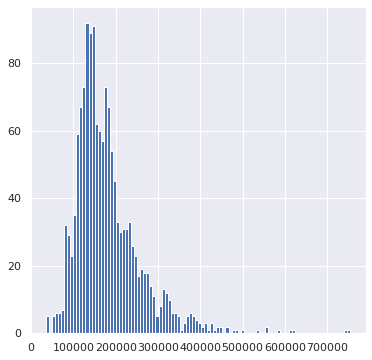

In [17]:
sns.set(rc={'figure.figsize': (6, 6)})
df["SalePrice"].hist(bins=100)
plt.show()

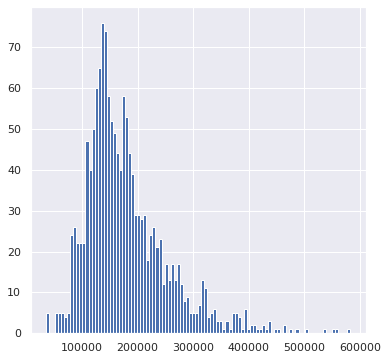

In [18]:
#600binden sonraki değerleri silelim.

df = df.loc[~(df.SalePrice>600000),]
df["SalePrice"].hist(bins = 100)
plt.show()

In [19]:
skewn = df["SalePrice"].skew()
print(f"Çarpıklık kat sayısı: {skewn}")

Çarpıklık kat sayısı: 1.4270110351394238


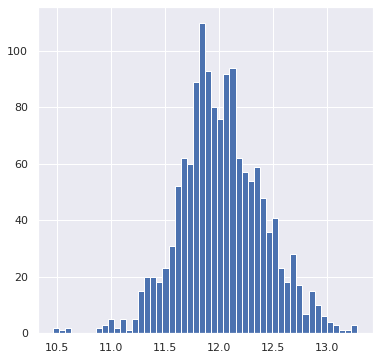

In [20]:
#dağılım sağa çarpıktır. Bunu normal dağılımı yakınlaştırmak için log alalım.

np.log1p(df['SalePrice']).hist(bins=50)
plt.show()

In [21]:
skewnlog = np.log1p(df["SalePrice"]).skew()
print(f"Çarpıklık kat sayısı: {skewnlog}")

Çarpıklık kat sayısı: 0.029134000796945246


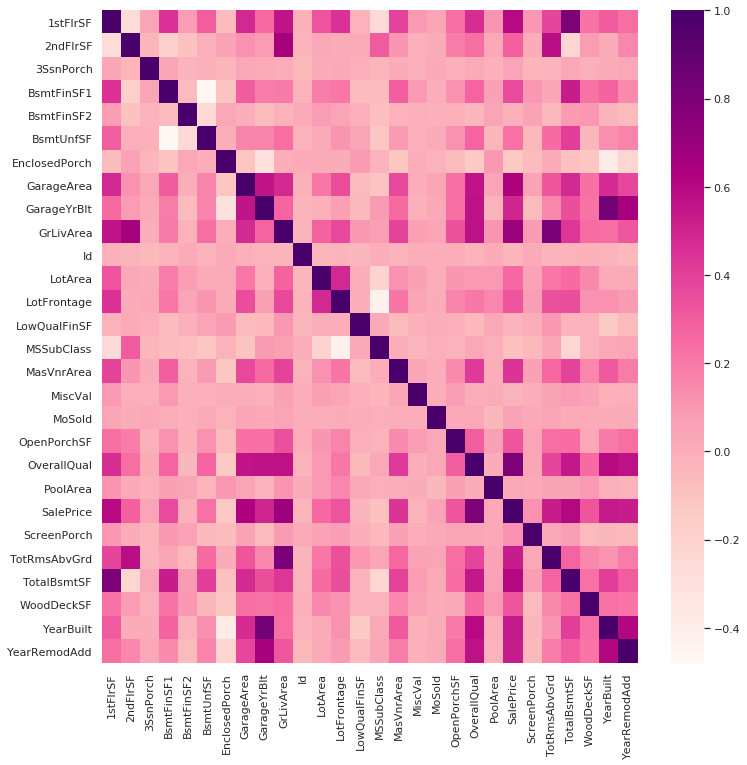

In [22]:
#korelasyon inceleyelim.

corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap = "RdPu")
plt.show(block = True)

In [23]:
#korelasyonu en yüksek columnları bulalım. Hazır kodu aldım.
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list


high_correlated_cols(df, plot=False)

['GarageCars', 'SalePrice', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']

In [24]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit



In [25]:
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

1stFlrSF True
2ndFlrSF False
3SsnPorch True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
EnclosedPorch True
GarageArea False
GarageYrBlt True
GrLivArea True
Id False
LotArea True
LotFrontage True
LowQualFinSF True
MSSubClass False
MasVnrArea True
MiscVal True
MoSold False
OpenPorchSF True
OverallQual False
PoolArea True
ScreenPorch True
TotRmsAbvGrd True
TotalBsmtSF True
WoodDeckSF True
YearBuilt False
YearRemodAdd False


In [26]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df,col)

In [27]:
for col in num_cols:
    if col != "SalePrice":
      print(col, check_outlier(df, col))

1stFlrSF False
2ndFlrSF False
3SsnPorch False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
EnclosedPorch False
GarageArea False
GarageYrBlt False
GrLivArea False
Id False
LotArea False
LotFrontage False
LowQualFinSF False
MSSubClass False
MasVnrArea False
MiscVal False
MoSold False
OpenPorchSF False
OverallQual False
PoolArea False
ScreenPorch False
TotRmsAbvGrd False
TotalBsmtSF False
WoodDeckSF False
YearBuilt False
YearRemodAdd False


In [28]:
#eksik değer analizi yapalım.

def missing_values_table(dataframe, na_name = False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending = False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending = False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis = 1, keys = ["n_miss", "ratio"])
    print(missing_df, end = "\n")
    
    if na_name:
        return na_columns

missing_values_table(df)

              n_miss  ratio
PoolQC          2906 99.690
MiscFeature     2810 96.400
Alley           2717 93.210
Fence           2345 80.450
SalePrice       1459 50.050
FireplaceQu     1420 48.710
LotFrontage      486 16.670
GarageQual       159  5.450
GarageCond       159  5.450
GarageFinish     159  5.450
GarageYrBlt      159  5.450
GarageType       157  5.390
BsmtExposure      82  2.810
BsmtCond          82  2.810
BsmtQual          81  2.780
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Utilities          2  0.070
Functional         2  0.070
Electrical         1  0.030
BsmtUnfSF          1  0.030
Exterior1st        1  0.030
Exterior2nd        1  0.030
TotalBsmtSF        1  0.030
GarageCars         1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030
KitchenQual        1  0.030
SaleType           1  0.030
GarageArea         1

In [29]:
#bazı değişkenlerde boş değerler evin o özelliğe sahip olmadığını ifade eder.

no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

#kolonlardaki boşlukların "no" ifadesi ile dolduralım.
for col in no_cols:
    df[col].fillna("No",inplace=True)

missing_values_table(df)

              n_miss  ratio
SalePrice       1459 50.050
LotFrontage      486 16.670
GarageYrBlt      159  5.450
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
Utilities          2  0.070
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Exterior1st        1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
Electrical         1  0.030
GarageCars         1  0.030
Exterior2nd        1  0.030
GarageArea         1  0.030
TotalBsmtSF        1  0.030
KitchenQual        1  0.030
SaleType           1  0.030
BsmtFinSF1         1  0.030


In [30]:
df.shape

(2915, 81)

In [31]:
#geri kalan eksik değerlerimizi de dolduralım.

def quick_missing_imp(data, num_method = "median", cat_length = 20, target = "SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    
    temp_target = data[target]
    
    print("-----BEFORE-----")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis = 0)
    
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis = 0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis = 0)
     
    data[target] = temp_target
    
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    return data
    

In [32]:
df = quick_missing_imp(df, num_method="median", cat_length=17)

-----BEFORE-----
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64 


BsmtFinSF1         0
BsmtFinSF2         0
BsmtFullBath       0
BsmtHalfBath       0
BsmtUnfSF          0
Electrical         0
Exterior1st        0
Exterior2nd        0
Functional         0
GarageArea         0
GarageCars         0
GarageYrBlt        0
KitchenQual        0
LotFrontage        0
MSZoning           0
MasVnrArea         0
MasVnrType         0
SalePrice       1459
SaleType           0
TotalBsmtSF        0
Utilities          0
dtype: int64 




In [33]:
#feature engineering başlayalım.

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                           "RATIO": dataframe[col].value_counts() / len(dataframe),
                           "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end = "\n\n\n")

In [34]:
rare_analyser(df, "SalePrice", cat_cols)

Alley : 3
      COUNT  RATIO  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2717  0.932   181984.843
Pave     78  0.027   168000.585


BldgType : 5
        COUNT  RATIO  TARGET_MEAN
1Fam     2421  0.831   184124.332
2fmCon     62  0.021   128432.258
Duplex    109  0.037   133541.077
Twnhs      96  0.033   135911.628
TwnhsE    227  0.078   181959.342


BsmtCond : 5
    COUNT  RATIO  TARGET_MEAN
Fa    104  0.036   121809.533
Gd    122  0.042   213599.908
No     82  0.028   105652.892
Po      5  0.002    64000.000
TA   2602  0.893   182100.772


BsmtExposure : 4
    COUNT  RATIO  TARGET_MEAN
Av    417  0.143   204196.345
Gd    273  0.094   248387.611
Mn    239  0.082   192789.658
No   1986  0.681   163439.248


BsmtFinType1 : 7
     COUNT  RATIO  TARGET_MEAN
ALQ    429  0.147   161573.068
BLQ    269  0.092   149493.655
GLQ    845  0.290   231077.966
LwQ    154  0.053   151852.703
No      79  0.027   105652.892
Rec    288  0.099   146889.248
Unf    851  0.292   170670.577


BsmtFinTyp

In [35]:
#buraya bakarak bazı columnları atacağım bazıları üzerinde oynamalar yapacağım.
#üzerinde işlem yapcaklarım: MSZoning, LotShape, ExterCond, GarageQual, BsmtFinType2 , Condition1 , BldgType
#atcaklarım: Street, Alley, LandContour, Utilities, LandSlope, Condition2, Heating, CentralAir, Functional, PoolQC, MiscFeature, Neighborhood, KitchenAbvGr

In [36]:
#MSZoning
df["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [37]:
#resident high ve resident mediumu birleştireyim. FV ve C birleştireyim.

df.loc[(df["MSZoning"] == "RH"), "MSZoning"] = "RM"
df.loc[(df["MSZoning"] == "FV"), "MSZoning"] = "FV + C (all)"
df.loc[(df["MSZoning"] == "C (all)"), "MSZoning"] = "FV + C (all)"
df["MSZoning"].value_counts()

RL              2265
RM               486
FV + C (all)     164
Name: MSZoning, dtype: int64

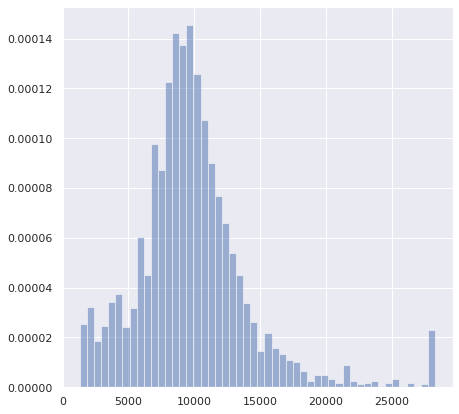

In [38]:
#LotArea

sns.set(rc = {"figure.figsize": (7, 7)})
plt.hist(df["LotArea"], bins = 50, alpha = 0.5, density = True)
plt.show()

In [39]:
#evin ft2sini gösterir. 280kya kadar değerler vardır.
#Çoğunluk alt değerlerde olduğu için gruplandıralım.

df["LotArea"].max(), df["LotArea"].mean()

(28300.699999999997, 9803.829914236707)

In [40]:
df.loc[(df["LotArea"] <= 1), "LotArea"]

Series([], Name: LotArea, dtype: float64)

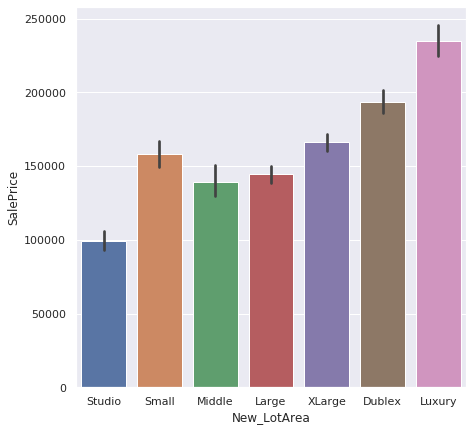

In [41]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, np.inf]
labels = ["Studio", "Small", "Middle", "Large", "XLarge", "Dublex", "Luxury"]
df["New_LotArea"] = pd.cut(df["LotArea"], bins, labels = labels)

sns.barplot(x = "New_LotArea", y = "SalePrice", data = df)

In [42]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_LotArea
0,856.000,854.000,0.000,No,3,1Fam,TA,No,706.000,0.000,GLQ,Unf,1.000,0.000,Gd,150.000,Y,Norm,Norm,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,No,0,PConc,2,Typ,548.000,2.000,TA,RFn,TA,Attchd,2003.000,1710.000,1,GasA,Ex,2Story,1.000,1,Gd,Lvl,Gtl,8450.000,Inside,65.000,Reg,0.000,60.000,RL,196.000,BrkFace,No,0.000,2.000,CollgCr,61.000,5,7.000,Y,0.000,No,CompShg,Gable,Normal,208500.000,WD,0.000,Pave,8.000,856.000,AllPub,0.000,2003.000,2003.000,2008,XLarge
1,1262.000,0.000,0.000,No,3,1Fam,TA,Gd,978.000,0.000,ALQ,Unf,0.000,1.000,Gd,284.000,Y,Feedr,Norm,SBrkr,0.000,TA,TA,MetalSd,MetalSd,No,TA,1,CBlock,2,Typ,460.000,2.000,TA,RFn,TA,Attchd,1976.000,1262.000,0,GasA,Ex,1Story,2.000,1,TA,Lvl,Gtl,9600.000,FR2,80.000,Reg,0.000,20.000,RL,0.000,None,No,0.000,5.000,Veenker,0.000,8,6.000,Y,0.000,No,CompShg,Gable,Normal,181500.000,WD,0.000,Pave,6.000,1262.000,AllPub,298.000,1976.000,1976.000,2007,XLarge
2,920.000,866.000,0.000,No,3,1Fam,TA,Mn,486.000,0.000,GLQ,Unf,1.000,0.000,Gd,434.000,Y,Norm,Norm,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,Typ,608.000,2.000,TA,RFn,TA,Attchd,2001.000,1786.000,1,GasA,Ex,2Story,3.000,1,Gd,Lvl,Gtl,11250.000,Inside,68.000,IR1,0.000,60.000,RL,162.000,BrkFace,No,0.000,9.000,CollgCr,42.000,5,7.000,Y,0.000,No,CompShg,Gable,Normal,223500.000,WD,0.000,Pave,6.000,920.000,AllPub,0.000,2001.000,2002.000,2008,Dublex
3,961.000,756.000,0.000,No,3,1Fam,Gd,No,216.000,0.000,ALQ,Unf,1.000,0.000,TA,540.000,Y,Norm,Norm,SBrkr,272.000,TA,TA,Wd Sdng,Wd Shng,No,Gd,1,BrkTil,1,Typ,642.000,3.000,TA,Unf,TA,Detchd,1998.000,1717.000,0,GasA,Gd,2Story,4.000,1,Gd,Lvl,Gtl,9550.000,Corner,60.000,IR1,0.000,70.000,RL,0.000,None,No,0.000,2.000,Crawfor,35.000,5,7.000,Y,0.000,No,CompShg,Gable,Abnorml,140000.000,WD,0.000,Pave,7.000,756.000,AllPub,0.000,1915.000,1970.000,2006,XLarge
4,1145.000,1053.000,0.000,No,4,1Fam,TA,Av,655.000,0.000,GLQ,Unf,1.000,0.000,Gd,490.000,Y,Norm,Norm,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,Typ,836.000,3.000,TA,RFn,TA,Attchd,2000.000,2198.000,1,GasA,Ex,2Story,5.000,1,Gd,Lvl,Gtl,14260.000,FR2,84.000,IR1,0.000,60.000,RL,350.000,BrkFace,No,0.000,12.000,NoRidge,84.000,5,8.000,Y,0.000,No,CompShg,Gable,Normal,250000.000,WD,0.000,Pave,9.000,1145.000,AllPub,192.000,2000.000,2000.000,2008,Luxury


In [43]:
df["New_LotArea"].value_counts()

XLarge    810
Luxury    620
Dublex    594
Large     462
Middle    216
Small     156
Studio     57
Name: New_LotArea, dtype: int64

In [44]:
#LotShape
df["LotShape"].value_counts()

Reg    1859
IR1     964
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [45]:
#mülkün genel şkelini gösterir.
#bunları da gruplandıralım.Regular ve ırregular olarak.

df.loc[(df["LotShape"] == "IR1"), "LotShape"] = "IR"
df.loc[(df["LotShape"] == "IR2"), "LotShape"] = "IR"
df.loc[(df["LotShape"] == "IR3"), "LotShape"] = "IR"

In [46]:
df["LotShape"].value_counts()

Reg    1859
IR     1056
Name: LotShape, dtype: int64

In [47]:
#ExterCond
df["ExterCond"].value_counts()

TA    2535
Gd     298
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [48]:
#malzemenin dış cephedeki durumunu gösterir.
#Po Ex de çok az değer var. Bunları da gruplandıralım.
#Ex = Excellent, Gd = Good, TA = Average, Fa = Fair, Po = Poor

df.loc[(df["ExterCond"] == "Fa"), "ExterCond"] = "FaPo"
df.loc[(df["ExterCond"] == "Po"), "ExterCond"] = "FaPo"
df.loc[(df["ExterCond"] == "Ex"), "ExterCond"] = "ExGd"
df.loc[(df["ExterCond"] == "Gd"), "ExterCond"] = "ExGd"

df["ExterCond"].value_counts()

TA      2535
ExGd     310
FaPo      70
Name: ExterCond, dtype: int64

In [49]:
#GarageQual
df['GarageQual'].value_counts()

TA    2600
No     159
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [50]:
#Garaj kalitesini belirtir.
#Bunlara da aynı işlemi uygulayalım.
#Ex = Excellent, Gd = Good, TA = Average, Fa = Fair, Po = Poor, Na = No Garage.

df.loc[(df["GarageQual"] == "Fa"), "GarageQual"] = "FaPo"
df.loc[(df["GarageQual"] == "Po"), "GarageQual"] = "FaPo"
df.loc[(df["GarageQual"] == "Ex"), "GarageQual"] = "ExGd"
df.loc[(df["GarageQual"] == "Gd"), "GarageQual"] = "ExGd"
df.loc[(df["GarageQual"] == "TA"), "GarageQual"] = "ExGd"

df['GarageQual'].value_counts()

ExGd    2627
No       159
FaPo     129
Name: GarageQual, dtype: int64

In [51]:
#Bsmntfintype1
df['BsmtFinType1'].value_counts()

Unf    851
GLQ    845
ALQ    429
Rec    288
BLQ    269
LwQ    154
No      79
Name: BsmtFinType1, dtype: int64

In [52]:
#Bsmtfintype2
df["BsmtFinType2"].value_counts()

Unf    2489
Rec     105
LwQ      87
No       80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [53]:
#birinci ve ikinci bodrumun bitmiş bölümünün kalitesi
#GLQ: Good Living Quarters, ALQ Average Living Quarters
#BLQ Below Average Living Quarters, Rec Average Rec Room
#LwQ Low Quality, Unf Unfinshed, NA No Basement

df.loc[(df["BsmtFinType1"] == "GLQ"), "BsmtFinType1"] = "RareExcellent"
df.loc[(df["BsmtFinType1"] == "ALQ"), "BsmtFinType1"] = "RareExcellent"
df.loc[(df["BsmtFinType1"] == "BLQ"), "BsmtFinType1"] = "RareGood"
df.loc[(df["BsmtFinType1"] == "LwQ"), "BsmtFinType1"] = "RareGood"
df.loc[(df["BsmtFinType1"] == "Rec"), "BsmtFinType1"] = "RareGood"

df.loc[(df["BsmtFinType2"] == "GLQ"), "BsmtFinType2"] = "RareExcellent"
df.loc[(df["BsmtFinType2"] == "ALQ"), "BsmtFinType2"] = "RareExcellent"
df.loc[(df["BsmtFinType2"] == "BLQ"), "BsmtFinType2"] = "RareGood"
df.loc[(df["BsmtFinType2"] == "LwQ"), "BsmtFinType2"] = "RareGood"
df.loc[(df["BsmtFinType2"] == "Rec"), "BsmtFinType2"] = "RareGood"


"""
#Bu işlemleri bu 4 satırla da yapabiliriz.
df["BsmtFinType1"] = np.where(df.BsmtFinType1.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType1"])
df["BsmtFinType1"] = np.where(df.BsmtFinType1.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType1"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["GLQ", "ALQ"]), "RareExcellent", df["BsmtFinType2"])
df["BsmtFinType2"] = np.where(df.BsmtFinType2.isin(["BLQ", "LwQ", "Rec"]), "RareGood", df["BsmtFinType2"])
"""

df['BsmtFinType1'].value_counts()

RareExcellent    1274
Unf               851
RareGood          711
No                 79
Name: BsmtFinType1, dtype: int64

In [54]:
df['BsmtFinType2'].value_counts()

Unf              2489
RareGood          260
RareExcellent      86
No                 80
Name: BsmtFinType2, dtype: int64

In [55]:
#Condition1
df['Condition1'].value_counts()

Norm      2507
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [56]:
"""
Anayola ya da demiryoluna yakınlığı göstermektedir. 
Bitişik olanları bir grup, normali bir grup ve diğerlerini mesafeli olduğu için bir grup yapabiliriz

Artery Adjacent to arterial street
Feedr Adjacent to feeder street
Norm Normal
RRNn Within 200' of North-South Railroad
RRAn Adjacent to North-South Railroad
PosN Near positive off-site feature--park, greenbelt, etc.
PosA Adjacent to postive off-site feature
RRNe Within 200' of East-West Railroad
RRAe Adjacent to East-West Railroad
"""

#Bu gruplandırmayı da farklı bi yolla yapalım.

df.loc[(df["Condition1"] == "Feedr") | (df["Condition1"] == "Artery") |
      (df["Condition1"] == "RRAn") | (df["Condition1"] == "PosA") | 
      (df["Condition1"] == "RRAe"), "Condition1"] = "AdjacentCondition"

df.loc[(df["Condition1"] == "RRNn") | (df["Condition1"] == "PosN") | 
       (df["Condition1"] == "RRNe"),"Condition1"] = "WithinCondition"

df.loc[(df["Condition1"] == "Norm") ,"Condition1"] = "NormalCondition"

df["Condition1"].value_counts()

NormalCondition      2507
AdjacentCondition     354
WithinCondition        54
Name: Condition1, dtype: int64

In [57]:
#Condition2
df['Condition2'].value_counts()

Norm      2885
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [58]:
#Grup çeşitliliği çok düşük bunu verisetinden çıkaralım.

df.drop("Condition2", axis = 1, inplace = True)

In [59]:
#BldgType

df["BldgType"].value_counts()

1Fam      2421
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [60]:
df.loc[(df["BldgType"] == "1Fam") | (df["BldgType"] == "2fmCon"), "BldgType"] = "Normal"
df.loc[(df["BldgType"] == "TwnhsE") | (df["BldgType"] == "Twnhs") | (df["BldgType"] == "Duplex"), "BldgType"] = "Big"
df["BldgType"].value_counts()

Normal    2483
Big        432
Name: BldgType, dtype: int64

In [61]:
df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)


In [62]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_LotArea,TotalQual
0,856.000,854.000,0.000,No,3,Normal,TA,No,706.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,150.000,Y,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,No,0,PConc,2,Typ,548.000,2.000,TA,RFn,ExGd,Attchd,2003.000,1710.000,1,GasA,Ex,2Story,1.000,1,Gd,Lvl,Gtl,8450.000,Inside,65.000,Reg,0.000,60.000,RL,196.000,BrkFace,No,0.000,2.000,CollgCr,61.000,5,7.000,Y,0.000,No,CompShg,Gable,Normal,208500.000,WD,0.000,Pave,8.000,856.000,AllPub,0.000,2003.000,2003.000,2008,XLarge,12.000
1,1262.000,0.000,0.000,No,3,Normal,TA,Gd,978.000,0.000,RareExcellent,Unf,0.000,1.000,Gd,284.000,Y,AdjacentCondition,SBrkr,0.000,TA,TA,MetalSd,MetalSd,No,TA,1,CBlock,2,Typ,460.000,2.000,TA,RFn,ExGd,Attchd,1976.000,1262.000,0,GasA,Ex,1Story,2.000,1,TA,Lvl,Gtl,9600.000,FR2,80.000,Reg,0.000,20.000,RL,0.000,None,No,0.000,5.000,Veenker,0.000,8,6.000,Y,0.000,No,CompShg,Gable,Normal,181500.000,WD,0.000,Pave,6.000,1262.000,AllPub,298.000,1976.000,1976.000,2007,XLarge,14.000
2,920.000,866.000,0.000,No,3,Normal,TA,Mn,486.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,434.000,Y,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,Typ,608.000,2.000,TA,RFn,ExGd,Attchd,2001.000,1786.000,1,GasA,Ex,2Story,3.000,1,Gd,Lvl,Gtl,11250.000,Inside,68.000,IR,0.000,60.000,RL,162.000,BrkFace,No,0.000,9.000,CollgCr,42.000,5,7.000,Y,0.000,No,CompShg,Gable,Normal,223500.000,WD,0.000,Pave,6.000,920.000,AllPub,0.000,2001.000,2002.000,2008,Dublex,12.000
3,961.000,756.000,0.000,No,3,Normal,Gd,No,216.000,0.000,RareExcellent,Unf,1.000,0.000,TA,540.000,Y,NormalCondition,SBrkr,272.000,TA,TA,Wd Sdng,Wd Shng,No,Gd,1,BrkTil,1,Typ,642.000,3.000,TA,Unf,ExGd,Detchd,1998.000,1717.000,0,GasA,Gd,2Story,4.000,1,Gd,Lvl,Gtl,9550.000,Corner,60.000,IR,0.000,70.000,RL,0.000,None,No,0.000,2.000,Crawfor,35.000,5,7.000,Y,0.000,No,CompShg,Gable,Abnorml,140000.000,WD,0.000,Pave,7.000,756.000,AllPub,0.000,1915.000,1970.000,2006,XLarge,12.000
4,1145.000,1053.000,0.000,No,4,Normal,TA,Av,655.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,490.000,Y,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,Typ,836.000,3.000,TA,RFn,ExGd,Attchd,2000.000,2198.000,1,GasA,Ex,2Story,5.000,1,Gd,Lvl,Gtl,14260.000,FR2,84.000,IR,0.000,60.000,RL,350.000,BrkFace,No,0.000,12.000,NoRidge,84.000,5,8.000,Y,0.000,No,CompShg,Gable,Normal,250000.000,WD,0.000,Pave,9.000,1145.000,AllPub,192.000,2000.000,2000.000,2008,Luxury,13.000


In [63]:
#overall: evin genel durumu ve kullanılan materyallerin kalitesi
df["Overall"] = df[["OverallQual", "OverallCond"]].sum(axis = 1)

In [64]:
#NEW_TotalFlrSF: Evin toplamdaki kapladığı yüzey alanı
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [65]:
#NEW_TotalBsmtFin: Tamamlanmış bodrum alanı
df["NEW_TotalBsmtFin"] = df["BsmtFinSF1"] + df["BsmtFinSF1"]

In [66]:
#NEW_PorchArea: Ev dışında kalan alan toplamı
df["NEW_PorchArea"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["ScreenPorch"] + df["3SsnPorch"] + df["WoodDeckSF"]

In [67]:
#NEW_TotalHouseArea: Evin toplam alanı
df["NEW_TotalHouseArea"] = df["NEW_TotalFlrSF"] + df["TotalBsmtSF"]

In [68]:
#NEW_TotalSqFeet: Evin toplam ft2
df["NEW_TotalSqFeet"] = df["GrLivArea"] + df["TotalBsmtSF"]

In [69]:
#NEW_TotalFullBath ve NEW_TotalHalfBath: Ev içerisindeki toplam yarı ve tam banyo sayısı
df["NEW_TotalFullBath"] = df["BsmtFullBath"] + df["FullBath"]
df["NEW_TotalHalfBath"] = df["BsmtHalfBath"] + df["HalfBath"]

In [70]:
#NEW_TotalBath: ev içerisinde bulunan toplam banyo
#Yarım banyoyu 0.5 ile çarpmanın mantığı tam bir banyo olmadığından dolayıdır. 2 banyo var demek yerine 1.5 banyo var diyoruz.
df["NEW_TotalBath"] = df["NEW_TotalFullBath"] + (df["NEW_TotalHalfBath"]*0.5)

In [71]:
#Lot Ratio: Yaşanan alan, toplam ev alanı ve garaj alanının arazinin ne kadarını kapladığı
df["NEW_LotRatio"] = df["GrLivArea"] / df["LotArea"]

df["NEW_RatioArea"] = df["NEW_TotalHouseArea"] / df["LotArea"]

df["NEW_GarageLotRatio"] = df["GarageArea"] / df["LotArea"]

In [72]:
#Tarihler arasındaki farklar
#Restorasyon ile yapım yılı arasında geçen yıl, Garajın yapım yılıyla evin yapım yılı arasındaki fark gibi değişkenler
#Yeni evleri tespit edebilmek için böyle bir uygulama yaptık.

df["NEW_Restoration"] = df["YearRemodAdd"] - df["YearBuilt"]

df["NEW_HouseAge"] = df["YrSold"] - df["YearBuilt"]

df["NEW_RestorationAge"] = df["YrSold"] - df["YearRemodAdd"]

df["NEW_GarageAge"] = df["GarageYrBlt"] - df["YearBuilt"]

df["NEW_GarageRestorationAge"] = np.abs(df["GarageYrBlt"] - df["YearRemodAdd"])

df["NEW_GarageSold"] = df["YrSold"] - df["GarageYrBlt"]

In [73]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_LotArea,TotalQual,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalFullBath,NEW_TotalHalfBath,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,856.000,854.000,0.000,No,3,Normal,TA,No,706.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,150.000,Y,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,No,0,PConc,2,Typ,548.000,2.000,TA,RFn,ExGd,Attchd,2003.000,1710.000,1,GasA,Ex,2Story,1.000,1,Gd,Lvl,Gtl,8450.000,Inside,65.000,Reg,0.000,60.000,RL,196.000,BrkFace,No,0.000,2.000,CollgCr,61.000,5,7.000,Y,0.000,No,CompShg,Gable,Normal,208500.000,WD,0.000,Pave,8.000,856.000,AllPub,0.000,2003.000,2003.000,2008,XLarge,12.000,12.000,1710.000,1412.000,61.000,2566.000,2566.000,3.000,1.000,3.500,0.202,0.304,0.065,0.000,5.000,5.000,0.000,0.000,5.000
1,1262.000,0.000,0.000,No,3,Normal,TA,Gd,978.000,0.000,RareExcellent,Unf,0.000,1.000,Gd,284.000,Y,AdjacentCondition,SBrkr,0.000,TA,TA,MetalSd,MetalSd,No,TA,1,CBlock,2,Typ,460.000,2.000,TA,RFn,ExGd,Attchd,1976.000,1262.000,0,GasA,Ex,1Story,2.000,1,TA,Lvl,Gtl,9600.000,FR2,80.000,Reg,0.000,20.000,RL,0.000,None,No,0.000,5.000,Veenker,0.000,8,6.000,Y,0.000,No,CompShg,Gable,Normal,181500.000,WD,0.000,Pave,6.000,1262.000,AllPub,298.000,1976.000,1976.000,2007,XLarge,14.000,14.000,1262.000,1956.000,298.000,2524.000,2524.000,2.000,1.000,2.500,0.131,0.263,0.048,0.000,31.000,31.000,0.000,0.000,31.000
2,920.000,866.000,0.000,No,3,Normal,TA,Mn,486.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,434.000,Y,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,Typ,608.000,2.000,TA,RFn,ExGd,Attchd,2001.000,1786.000,1,GasA,Ex,2Story,3.000,1,Gd,Lvl,Gtl,11250.000,Inside,68.000,IR,0.000,60.000,RL,162.000,BrkFace,No,0.000,9.000,CollgCr,42.000,5,7.000,Y,0.000,No,CompShg,Gable,Normal,223500.000,WD,0.000,Pave,6.000,920.000,AllPub,0.000,2001.000,2002.000,2008,Dublex,12.000,12.000,1786.000,972.000,42.000,2706.000,2706.000,3.000,1.000,3.500,0.159,0.241,0.054,1.000,7.000,6.000,0.000,1.000,7.000
3,961.000,756.000,0.000,No,3,Normal,Gd,No,216.000,0.000,RareExcellent,Unf,1.000,0.000,TA,540.000,Y,NormalCondition,SBrkr,272.000,TA,TA,Wd Sdng,Wd Shng,No,Gd,1,BrkTil,1,Typ,642.000,3.000,TA,Unf,ExGd,Detchd,1998.000,1717.000,0,GasA,Gd,2Story,4.000,1,Gd,Lvl,Gtl,9550.000,Corner,60.000,IR,0.000,70.000,RL,0.000,None,No,0.000,2.000,Crawfor,35.000,5,7.000,Y,0.000,No,CompShg,Gable,Abnorml,140000.000,WD,0.000,Pave,7.000,756.000,AllPub,0.000,1915.000,1970.000,2006,XLarge,12.000,12.000,1717.000,432.000,307.000,2473.000,2473.000,2.000,0.000,2.000,0.180,0.259,0.067,55.000,91.000,36.000,83.000,28.000,8.000
4,1145.000,1053.000,0.000,No,4,Normal,TA,Av,655.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,490.000,Y,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,Typ,836.000,3.000,TA,RFn,ExGd,Attchd,2000.000,2198.000,1,GasA,Ex,2Story,5.000,1,Gd,Lvl,Gtl,14260.000,FR2,84.000,IR,0.000,60.000,RL,350.000,BrkFace,No,0.000,12.000,NoRidge,84.000,5,8.000,Y,0.000,No,CompShg,Gable,Normal,250000.000,WD,0.000,Pave,9.000,1145.000,AllPub,192.000,2000.000,2000.000,20

In [74]:
#Veri setinde gereksiz gördüğümüz columnları çıkaralım.
drop_list = ["Street", "Alley", "LandContour", "Utilities" ,"LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood","KitchenAbvGr", "CentralAir", "Functional"]

df.drop(drop_list, axis = 1, inplace = True)

In [75]:
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

Observations: 2915
Variables: 88
cat_cols: 48
num_cols: 40
cat_but_car: 0
num_but_cat: 17


In [76]:
labelencoder = preprocessing.LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

for col in binary_cols:
    df[col] = labelencoder.fit_transform(df[col])

In [77]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,HouseStyle,Id,KitchenQual,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,New_LotArea,TotalQual,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalFullBath,NEW_TotalHalfBath,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,856.000,854.000,0.000,3,1,TA,No,706.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,150.000,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,No,0,PConc,2,548.000,2.000,TA,RFn,ExGd,Attchd,2003.000,1710.000,1,Ex,2Story,1.000,Gd,8450.000,Inside,65.000,1,0.000,60.000,RL,196.000,BrkFace,0.000,2.000,61.000,5,7.000,Y,0.000,CompShg,Gable,Normal,208500.000,WD,0.000,8.000,856.000,0.000,2003.000,2003.000,2008,XLarge,12.000,12.000,1710.000,1412.000,61.000,2566.000,2566.000,3.000,1.000,3.500,0.202,0.304,0.065,0.000,5.000,5.000,0.000,0.000,5.000
1,1262.000,0.000,0.000,3,1,TA,Gd,978.000,0.000,RareExcellent,Unf,0.000,1.000,Gd,284.000,AdjacentCondition,SBrkr,0.000,TA,TA,MetalSd,MetalSd,No,TA,1,CBlock,2,460.000,2.000,TA,RFn,ExGd,Attchd,1976.000,1262.000,0,Ex,1Story,2.000,TA,9600.000,FR2,80.000,1,0.000,20.000,RL,0.000,None,0.000,5.000,0.000,8,6.000,Y,0.000,CompShg,Gable,Normal,181500.000,WD,0.000,6.000,1262.000,298.000,1976.000,1976.000,2007,XLarge,14.000,14.000,1262.000,1956.000,298.000,2524.000,2524.000,2.000,1.000,2.500,0.131,0.263,0.048,0.000,31.000,31.000,0.000,0.000,31.000
2,920.000,866.000,0.000,3,1,TA,Mn,486.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,434.000,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,608.000,2.000,TA,RFn,ExGd,Attchd,2001.000,1786.000,1,Ex,2Story,3.000,Gd,11250.000,Inside,68.000,0,0.000,60.000,RL,162.000,BrkFace,0.000,9.000,42.000,5,7.000,Y,0.000,CompShg,Gable,Normal,223500.000,WD,0.000,6.000,920.000,0.000,2001.000,2002.000,2008,Dublex,12.000,12.000,1786.000,972.000,42.000,2706.000,2706.000,3.000,1.000,3.500,0.159,0.241,0.054,1.000,7.000,6.000,0.000,1.000,7.000
3,961.000,756.000,0.000,3,1,Gd,No,216.000,0.000,RareExcellent,Unf,1.000,0.000,TA,540.000,NormalCondition,SBrkr,272.000,TA,TA,Wd Sdng,Wd Shng,No,Gd,1,BrkTil,1,642.000,3.000,TA,Unf,ExGd,Detchd,1998.000,1717.000,0,Gd,2Story,4.000,Gd,9550.000,Corner,60.000,0,0.000,70.000,RL,0.000,None,0.000,2.000,35.000,5,7.000,Y,0.000,CompShg,Gable,Abnorml,140000.000,WD,0.000,7.000,756.000,0.000,1915.000,1970.000,2006,XLarge,12.000,12.000,1717.000,432.000,307.000,2473.000,2473.000,2.000,0.000,2.000,0.180,0.259,0.067,55.000,91.000,36.000,83.000,28.000,8.000
4,1145.000,1053.000,0.000,4,1,TA,Av,655.000,0.000,RareExcellent,Unf,1.000,0.000,Gd,490.000,NormalCondition,SBrkr,0.000,TA,Gd,VinylSd,VinylSd,No,TA,1,PConc,2,836.000,3.000,TA,RFn,ExGd,Attchd,2000.000,2198.000,1,Ex,2Story,5.000,Gd,14260.000,FR2,84.000,0,0.000,60.000,RL,350.000,BrkFace,0.000,12.000,84.000,5,8.000,Y,0.000,CompShg,Gable,Normal,250000.000,WD,0.000,9.000,1145.000,192.000,2000.000,2000.000,2008,Luxury,13.000,13.000,2198.000,1310.000,276.000,3343.000,3343.000,3.000,1.000,3.500,0.154,0.234,0.059,0.000,8.000,8.000,0.000,0.000,8.000


In [78]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,Id,LotArea,LotFrontage,MSSubClass,MasVnrArea,MoSold,OpenPorchSF,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,TotalQual,Overall,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_TotalBath,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,BldgType_1,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_RareExcellent,BsmtFinType1_RareGood,BsmtFinType1_Unf,BsmtFinType2_RareExcellent,BsmtFinType2_RareGood,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,Condition1_NormalCondition,Condition1_WithinCondition,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_FaPo,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_FaPo,GarageQual_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_1,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FullBath_1,FullBath_2,FullBath_3,FullBath_4,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,HalfBath_1,HalfBath_2,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,New_LotArea_Small,New_LotArea_Middle,New_LotArea_Large,New_LotArea_XLarge,New_LotArea_Dublex,New_LotArea_Luxury,NEW_TotalFullBath_1.0,NEW_TotalFullBath_2.0,NEW_TotalFullBath_3.0,NEW_TotalFullBath_4.0,NEW_TotalFullBath_6.0,NEW_TotalHalfBath_1.0,NEW_TotalHalfBath_2.0,NEW_TotalHalfBath_3.0,NEW_TotalHalfBath_4.0
0,856.000,854.000,706.000,0.000,150.000,0.000,548.000,2003.000,1710.000,1.000,8450.000,65.000,60.000,196.000,2.000,61.000,7.000,208500.000,8.000,856.000,0.000,2003.000,2003.000,12.000,12.000,1710.000,1412.000,61.000,2566.000,2566.000,3.500,0.202,0.304,0.065,0.000,5.000,5.000,0.000,0.000,5.000,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,

In [79]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
#Model Kısmına Geçelim.

missing_values_table(df)

           n_miss  ratio
SalePrice    1459 50.050


In [81]:
#Veri setine log dönüşümü yapalım. Çünkü verisetimizin çarpık olduğunu gördük.
#Bu çarpıklığı azaltıp daha iyi sonuçlar elde edebiliriz.

train_df = df[df["SalePrice"].notnull()]
test_df = df[df["SalePrice"].isnull()]
test_df.drop("SalePrice", axis = 1, inplace = True)

y = np.log1p(df[df['SalePrice'].notnull()]['SalePrice'])
X = train_df.drop(["Id","SalePrice"], axis = 1)

/usr/lib/python3/dist-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv = 5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name})")

RMSE: 2337.4406 (LR)
RMSE: 0.1474 (Ridge)
RMSE: 0.1834 (Lasso)
RMSE: 0.1769 (ElasticNet)
RMSE: 0.2128 (KNN)
RMSE: 0.2001 (CART)
RMSE: 0.1402 (RF)
RMSE: 0.1962 (SVR)
RMSE: 0.13 (GBM)
RMSE: 0.1404 (XGBoost)
RMSE: 0.1346 (LightGBM)


In [83]:
xgboost_model = XGBRegressor(objective='reg:squarederror')

rmse = np.mean(np.sqrt(-cross_val_score(xgboost_model,
                                        X, y, cv=5, scoring="neg_mean_squared_error")))


xgboost_params = {"learning_rate": [0.1, 0.01, 0.03],
                  "max_depth": [5, 6, 8],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1]}

xgboost_gs_best = GridSearchCV(xgboost_model,
                            xgboost_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [84]:
xgboost_gs_best.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.03,
 'max_depth': 6,
 'n_estimators': 300}

In [85]:
final_model = xgboost_model.set_params(**xgboost_gs_best.best_params_).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring="neg_mean_squared_error")))

round(rmse, 4)

0.1278

In [86]:
#modeli test edelim
xgboost_tuned = XGBRegressor(objective='reg:squarederror',**xgboost_gs_best.best_params_).fit(X_train, y_train)
y_pred = xgboost_tuned.predict(X_test)

#log dönüşümünün tersini alalım.
new_y = np.expm1(y_pred)
new_y_test = np.expm1(y_test)

np.sqrt(mean_squared_error(new_y_test, new_y))

24469.95241832536

In [87]:
df['SalePrice'].mean()

179538.66002747254

In [90]:
#Submission olarak indirelim.

submission_df = pd.DataFrame()
submission_df['Id'] = test_df["Id"].astype("Int32")

y_pred_sub = xgboost_tuned.predict(test_df.drop("Id", axis=1))

y_pred_sub = np.expm1(y_pred_sub)

submission_df['SalePrice'] = y_pred_sub

submission_df.to_csv("my_submission.csv", index = False)

In [93]:
df["SalePrice"][1461]

nan

In [95]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Gd,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,5,Typ,0,NaN,NaN,nan,NaN,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.000,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,252.000,Unf,0.000,294.000,546.000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.000,Unf,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.000,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,1224.000,Unf,0.000,0.000,1224.000,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.000,0.000,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.000,Unf,2.000,576.000,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.000,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.000,TA,TA,PConc,Gd,TA,Av,GLQ,337.000,Unf,0.000,575.000,912.000,GasA,TA,Y,SBrkr,970,0,0,970,0.000,1.000,1,0,3,1,TA,6,Typ,0,NaN,NaN,nan,NaN,0.000,0.000,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.000,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.000,TA,TA,PConc,Gd,TA,Av,LwQ,758.000,Unf,0.000,238.000,996.000,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.000,0.000,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.000,Fin,3.000,650.000,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
